<a href="https://colab.research.google.com/github/hinazargham/DeepLearning_ColabNotebooks/blob/main/MNIST_Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MNIST Fashion**

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.



To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.

For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

#### **Labels**

Each training and test example is assigned to one of the following labels:

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

Each row is a separate image
Column 1 is the class label.
Remaining columns are pixel numbers (784 total).
Each value is the darkness of the pixel (1 to 255)

**Listing 2.1 Loading the MNIST-Fashion dataset in Keras**

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
print(len(train_images))
print(len(train_labels))

60000
60000


In [4]:
print(len(test_images))
print(len(test_labels))

10000
10000


In [6]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [7]:
print(test_images.shape)
print(test_labels.shape)

(10000, 28, 28)
(10000,)


Class Label: 0


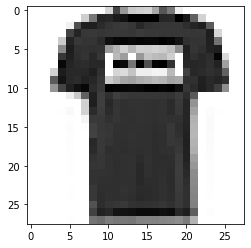

In [14]:
import matplotlib.pyplot as plt

digit = train_images[1]
print("Class Label:",train_labels[1])
#digit.shape

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Class Label: 2


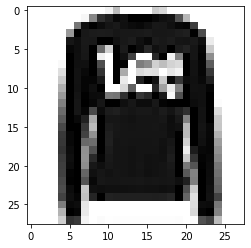

In [15]:
import matplotlib.pyplot as plt

digit = test_images[1]
print("Class Label:",test_labels[1])
#digit.shape

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [10]:
import numpy as np
print(train_labels)
print(np.unique(train_labels))

[9 0 0 ... 3 0 5]
[0 1 2 3 4 5 6 7 8 9]


In [11]:
import numpy as np
print(test_labels)
print(np.unique(test_labels))

[9 2 1 ... 8 1 5]
[0 1 2 3 4 5 6 7 8 9]


**Listing 2.2 The network architecture**

In [16]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()

network.add(layers.Dense(512, activation='relu', input_shape=(28*28, )))
network.add(layers.Dense(10, activation='softmax'))

**Listing 2.3 The compilation step**

In [18]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

**Listing 2.4 Preparing the image data**

In [19]:
train_images = train_images.reshape((60000, 28 * 28)) # change shape from 3d to 2d and  image from 2d to 1d # 60000 rows, 784 columns
train_images = train_images.astype('float32') / 255 #Normalization

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255 #Normalization

**Listing 2.5 Preparing the labels**

In [22]:
train_labels[1]

0

In [23]:
test_labels[1]

2

In [24]:
train_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [25]:
test_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

**One-Hot-Encoding**

In [26]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [29]:
train_labels[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [28]:
test_labels[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

**Now Train your Model**

In [30]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.7507 - accuracy: 0.7450
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3934 - accuracy: 0.8563
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3413 - accuracy: 0.8734
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3131 - accuracy: 0.8851
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2911 - accuracy: 0.8915


In [31]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3611 - accuracy: 0.8693
test_acc: 0.8693000078201294


In [ ]:
link for refrence : https://www.kaggle.com/zalando-research/fashionmnist